In [291]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install xgboost
# !pip install lightgbm
# !pip install sklearn

# 라이브러리 임포트
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, RidgeCV, RidgeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

## 변수 설명
  - **int_rate** : 대출자에 부여된 이자율 (Interest rate of the loan the applicant received)
  - **annual_inc** : 연 소득 (annual income)
  - **dti** : 소득 대비 부채 비율 (Debt-to-income ratio)
  - **delinq_2yrs** : 지난 2년 간 체납 발생 횟수 (Delinquencies on lines of credit in the last 2 years)
  - **inq_last_6mths** : 지난 6개월 간 신용 조회 수 (Inquiries into the applicant's credit during the last 6 months)
  - **pub_rec** : 파산 횟수 (Number of bankruptcies listed in the public record)
  - **revol_bal** : 리볼빙 잔액 (Total credit revolving balance)
  - **total_acc** : 지금까지 소유했던 신용카드 개수 (num_total_cc_accounts : Total number of credit card accounts in the applicant's history)
  - **collections_12_mths_ex_med** : 의료부문을 제외한 지난 12개월 간 추심 발생 횟수 (num_collections_last_12m : Number of collections in the last 12 months. This excludes medical collections)
  - **acc_now_delinq** : 대출자가 체납 상태에 있지 않은 계좌의 수 (The number of accounts on which the borrower is now delinquent)
  - **tot_coll_amt** : 대출자에 대한 현재까지의 총 추심액 (total_collection_amount_ever : The total amount that the applicant has had against them in collections)
  - **tot_cur_bal** : 전 계좌의 현재 통합 잔고 (Total current balance of all accounts)
  - **chargeoff_within_12_mths** : 대출 부 신청인의 대출 신청 직전 12개월 간 세금 공제 횟수 (Number of charge-offs within last 12 months at time of application for the secondary applicant)
  - **delinq_amnt** : 체납 금액 (delinquency amount)
  - **tax_liens** : 세금 저당권의 수 (Number of tax liens)
  - **emp_length1 ~ 12** : 고용 연수 (Number of years in the job)
  - **home_ownership1 ~ 6** : 대출 신청자의 주거 소유 형태 (The ownership status of the applicant's residence)
  - **verification_status1 ~ 3** : 공동 소득 발생 여부 및 형태 (verification_income_joint : Type of verification of the joint income)
  - **purpose1 ~ 14** : 대출 목적 (The purpose of the loan)
  - **initial_list_status1 ~ 2** : 최초 대출 상태 (Initial listing status of the loan)
  - **mths_since_last_delinq1 ~ 11** : 마지막 체납이 지금으로부터 몇개월 전에 있었는지를 나타내는 변수 (Months since the last delinquency)
  
  - **funded_amnt** : 대출액 (Funded amount)
  - **funded_amnt_inv** : 사채 대출액 (Funded amount by investors)
  - **total_rec_late_fee** : 총 연체료 중 납부액 (Late fees received to date)
  - **term1** : 상환 기간 (The number of payments on the loan. Values are in months and can be either 36 or 60)
  - **open_acc** : 개설 개좌 수 (The number of open credit lines in the borrower's credit file)
  - **installment** : 대출 발생 시 월 상환액 (The monthly payment owed by the borrower if the loan originates)
  - **revol_util** : 리볼빙 한도 대비 리볼빙 사용 비율 (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit)
  - **out_prncp** : 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded)
  - **out_prncp_inv** : 사채 대출액 중 원리금 잔액 (Remaining outstanding principal for total amount funded by investors)
  - **total_rec_int** : 이자 상환액 (Interest received to date)
  - **fico_range_low** : FICO(일종의 신용점수) 최저값 (The lower boundary range the borrower’s FICO at loan origination belongs to)
  - **fico_range_high** : FICO(일종의 신용점수) 최고값 (The upper boundary range the borrower’s FICO at loan origination belongs to)
  
  - **depvar** : 고객의 부도 여부 (dependent variable)

In [292]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/220126/data/train.csv')
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,initial_list_status1,initial_list_status2,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1


### 컬럼 합쳐주기

In [293]:
df['emp_length'] = 0

for i, column in enumerate(df.loc[:,'emp_length1':'emp_length12'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['emp_length'][j] = i

sum(df['emp_length'] > 0)

100000

In [294]:
df = df.drop(df.loc[:,'emp_length1':'emp_length12'].columns, axis=1)

In [295]:
df['home_ownership'] = 0

for i, column in enumerate(df.loc[:,'home_ownership1':'home_ownership6'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['home_ownership'][j] = i

sum(df['home_ownership'] > 0)

100000

In [296]:
df = df.drop(df.loc[:,'home_ownership1':'home_ownership6'].columns, axis=1)

In [297]:
df['verification_status'] = 0

for i, column in enumerate(df.loc[:,'verification_status1':'verification_status3'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['verification_status'][j] = i

sum(df['verification_status'] > 0)

100000

In [298]:
df = df.drop(df.loc[:,'verification_status1':'verification_status3'].columns, axis=1)

In [299]:
df['purpose'] = 0

for i, column in enumerate(df.loc[:,'purpose1':'purpose14'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['purpose'][j] = i

sum(df['purpose'] > 0)

100000

In [300]:
df = df.drop(df.loc[:,'purpose1':'purpose14'].columns, axis=1)

In [301]:
df['initial_list_status'] = 0

for i, column in enumerate(df.loc[:,'initial_list_status1':'initial_list_status2'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['initial_list_status'][j] = i

sum(df['initial_list_status'] > 0)

100000

In [302]:
df = df.drop(df.loc[:,'initial_list_status1':'initial_list_status2'].columns, axis=1)

In [303]:
df['mths_since_last_delinq'] = 0

for i, column in enumerate(df.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns,1):
    for j, data in enumerate(df[column]):
        if data == 1:
            df['mths_since_last_delinq'][j] = i

sum(df['mths_since_last_delinq'] > 0)

100000

In [304]:
df = df.drop(df.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns, axis=1)

In [305]:
df.head()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
0,0.0824,21000.0,29.19,0,1,0,3016,26,0,0,0,11773,0,0,0,1200,1200.0,0.0,1,18,37.74,0.076,0.0,0.0,157.94,765,769,0,1,6,2,2,2,1
1,0.1299,80000.0,4.82,0,1,1,5722,24,0,0,0,21875,0,0,0,8000,8000.0,0.0,1,8,269.52,0.447,0.0,0.0,1702.42,665,669,0,2,6,3,3,2,1
2,0.1299,38000.0,23.66,0,3,0,6511,18,0,0,0,31868,0,0,0,5000,5000.0,0.0,1,7,168.45,0.880,0.0,0.0,1066.64,670,674,0,4,6,2,3,2,11
3,0.1367,100000.0,16.27,4,2,0,6849,30,0,0,0,326049,0,0,0,15000,15000.0,0.0,1,12,510.27,0.457,0.0,0.0,1256.24,680,684,1,3,2,3,3,2,5
4,0.1269,30000.0,25.28,0,1,2,8197,12,0,0,2506,8840,0,0,0,10000,10000.0,0.0,1,8,335.45,0.416,0.0,0.0,871.04,660,664,1,4,6,2,3,2,1


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   int_rate                    100000 non-null  float64
 1   annual_inc                  100000 non-null  float64
 2   dti                         100000 non-null  float64
 3   delinq_2yrs                 100000 non-null  int64  
 4   inq_last_6mths              100000 non-null  int64  
 5   pub_rec                     100000 non-null  int64  
 6   revol_bal                   100000 non-null  int64  
 7   total_acc                   100000 non-null  int64  
 8   collections_12_mths_ex_med  100000 non-null  int64  
 9   acc_now_delinq              100000 non-null  int64  
 10  tot_coll_amt                100000 non-null  int64  
 11  tot_cur_bal                 100000 non-null  int64  
 12  chargeoff_within_12_mths    100000 non-null  int64  
 13  delinq_amnt    

In [307]:
df.describe()

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.130833,7.436061e+04,18.514508,0.343700,0.668880,0.235720,16090.202820,24.675910,0.018810,0.005800,250.588120,1.305281e+05,0.009630,19.288330,0.063820,13735.317750,13729.341073,2.448885e+00,0.855920,11.620700,434.077648,0.537233,0.253327,0.253259,2491.282802,692.630550,696.630660,0.325690,5.084010,4.022680,1.966200,3.660050,1.565570,3.774040
std,0.044773,7.467409e+04,8.413049,0.905007,0.952044,0.661468,21569.939271,11.883834,0.150321,0.083585,2042.770881,1.503326e+05,0.110079,893.304366,0.468027,8464.825314,8461.694483,1.489496e+01,0.351173,5.458774,265.921746,0.239373,18.053290,18.051746,2706.262200,29.668017,29.668584,0.468634,3.569059,1.915234,0.780169,2.362892,0.495684,3.410721
min,0.053200,5.360000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1000.000000,800.000000,-2.000000e-09,0.000000,1.000000,23.360000,0.000000,0.000000,0.000000,0.000000,660.000000,664.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.097500,4.500000e+04,12.200000,0.000000,0.000000,0.000000,6009.000000,16.000000,0.000000,0.000000,0.000000,2.698900e+04,0.000000,0.000000,0.000000,7200.000000,7200.000000,0.000000e+00,1.000000,8.000000,240.292500,0.361000,0.000000,0.000000,857.292500,670.000000,674.000000,0.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000
50%,0.127400,6.200000e+04,18.060000,0.000000,0.000000,0.000000,11030.500000,23.000000,0.000000,0.000000,0.000000,6.802350e+04,0.000000,0.000000,0.000000,12000.000000,12000.000000,0.000000e+00,1.000000,11.000000,366.370000,0.541000,0.000000,0.000000,1615.160000,685.000000,689.000000,0.000000,4.000000,5.000000,2.000000,3.000000,2.000000,2.000000
75%,0.158000,9.000000e+04,24.530000,0.000000,1.000000,0.000000,19540.000000,31.000000,0.000000,0.000000,0.000000,1.943098e+05,0.000000,0.000000,0.000000,19200.000000,19200.000000,0.000000e+00,1.000000,14.000000,575.860000,0.720000,0.000000,0.000000,3039.115000,705.000000,709.000000,1.000000,8.000000,6.000000,3.000000,3.000000,2.000000,7.000000
max,0.309900,8.300000e+06,49.930000,20.000000,6.000000,63.000000,971736.000000,176.000000,5.000000,6.000000,197765.000000,3.164353e+06,7.000000,94521.000000,63.000000,40000.000000,40000.000000,8.741700e+02,1.000000,82.000000,1584.900000,8.923000,2330.970000,2330.970000,28005.960000,845.000000,850.000000,1.000000,12.000000,6.000000,3.000000,14.000000,2.000000,11.000000


In [308]:
# 결측치 확인
pd.DataFrame(df.isnull().sum()).rename(columns={0:'Non-Null Count'}).T

,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_bal,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,tax_liens,funded_amnt,funded_amnt_inv,total_rec_late_fee,term1,open_acc,installment,revol_util,out_prncp,out_prncp_inv,total_rec_int,fico_range_low,fico_range_high,depvar,emp_length,home_ownership,verification_status,purpose,initial_list_status,mths_since_last_delinq
Non-Null Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 다중공선성 제거 시도

In [309]:
# open_acc 추가
df = df.drop(['out_prncp_inv','funded_amnt_inv','fico_range_high','funded_amnt'],axis=1)

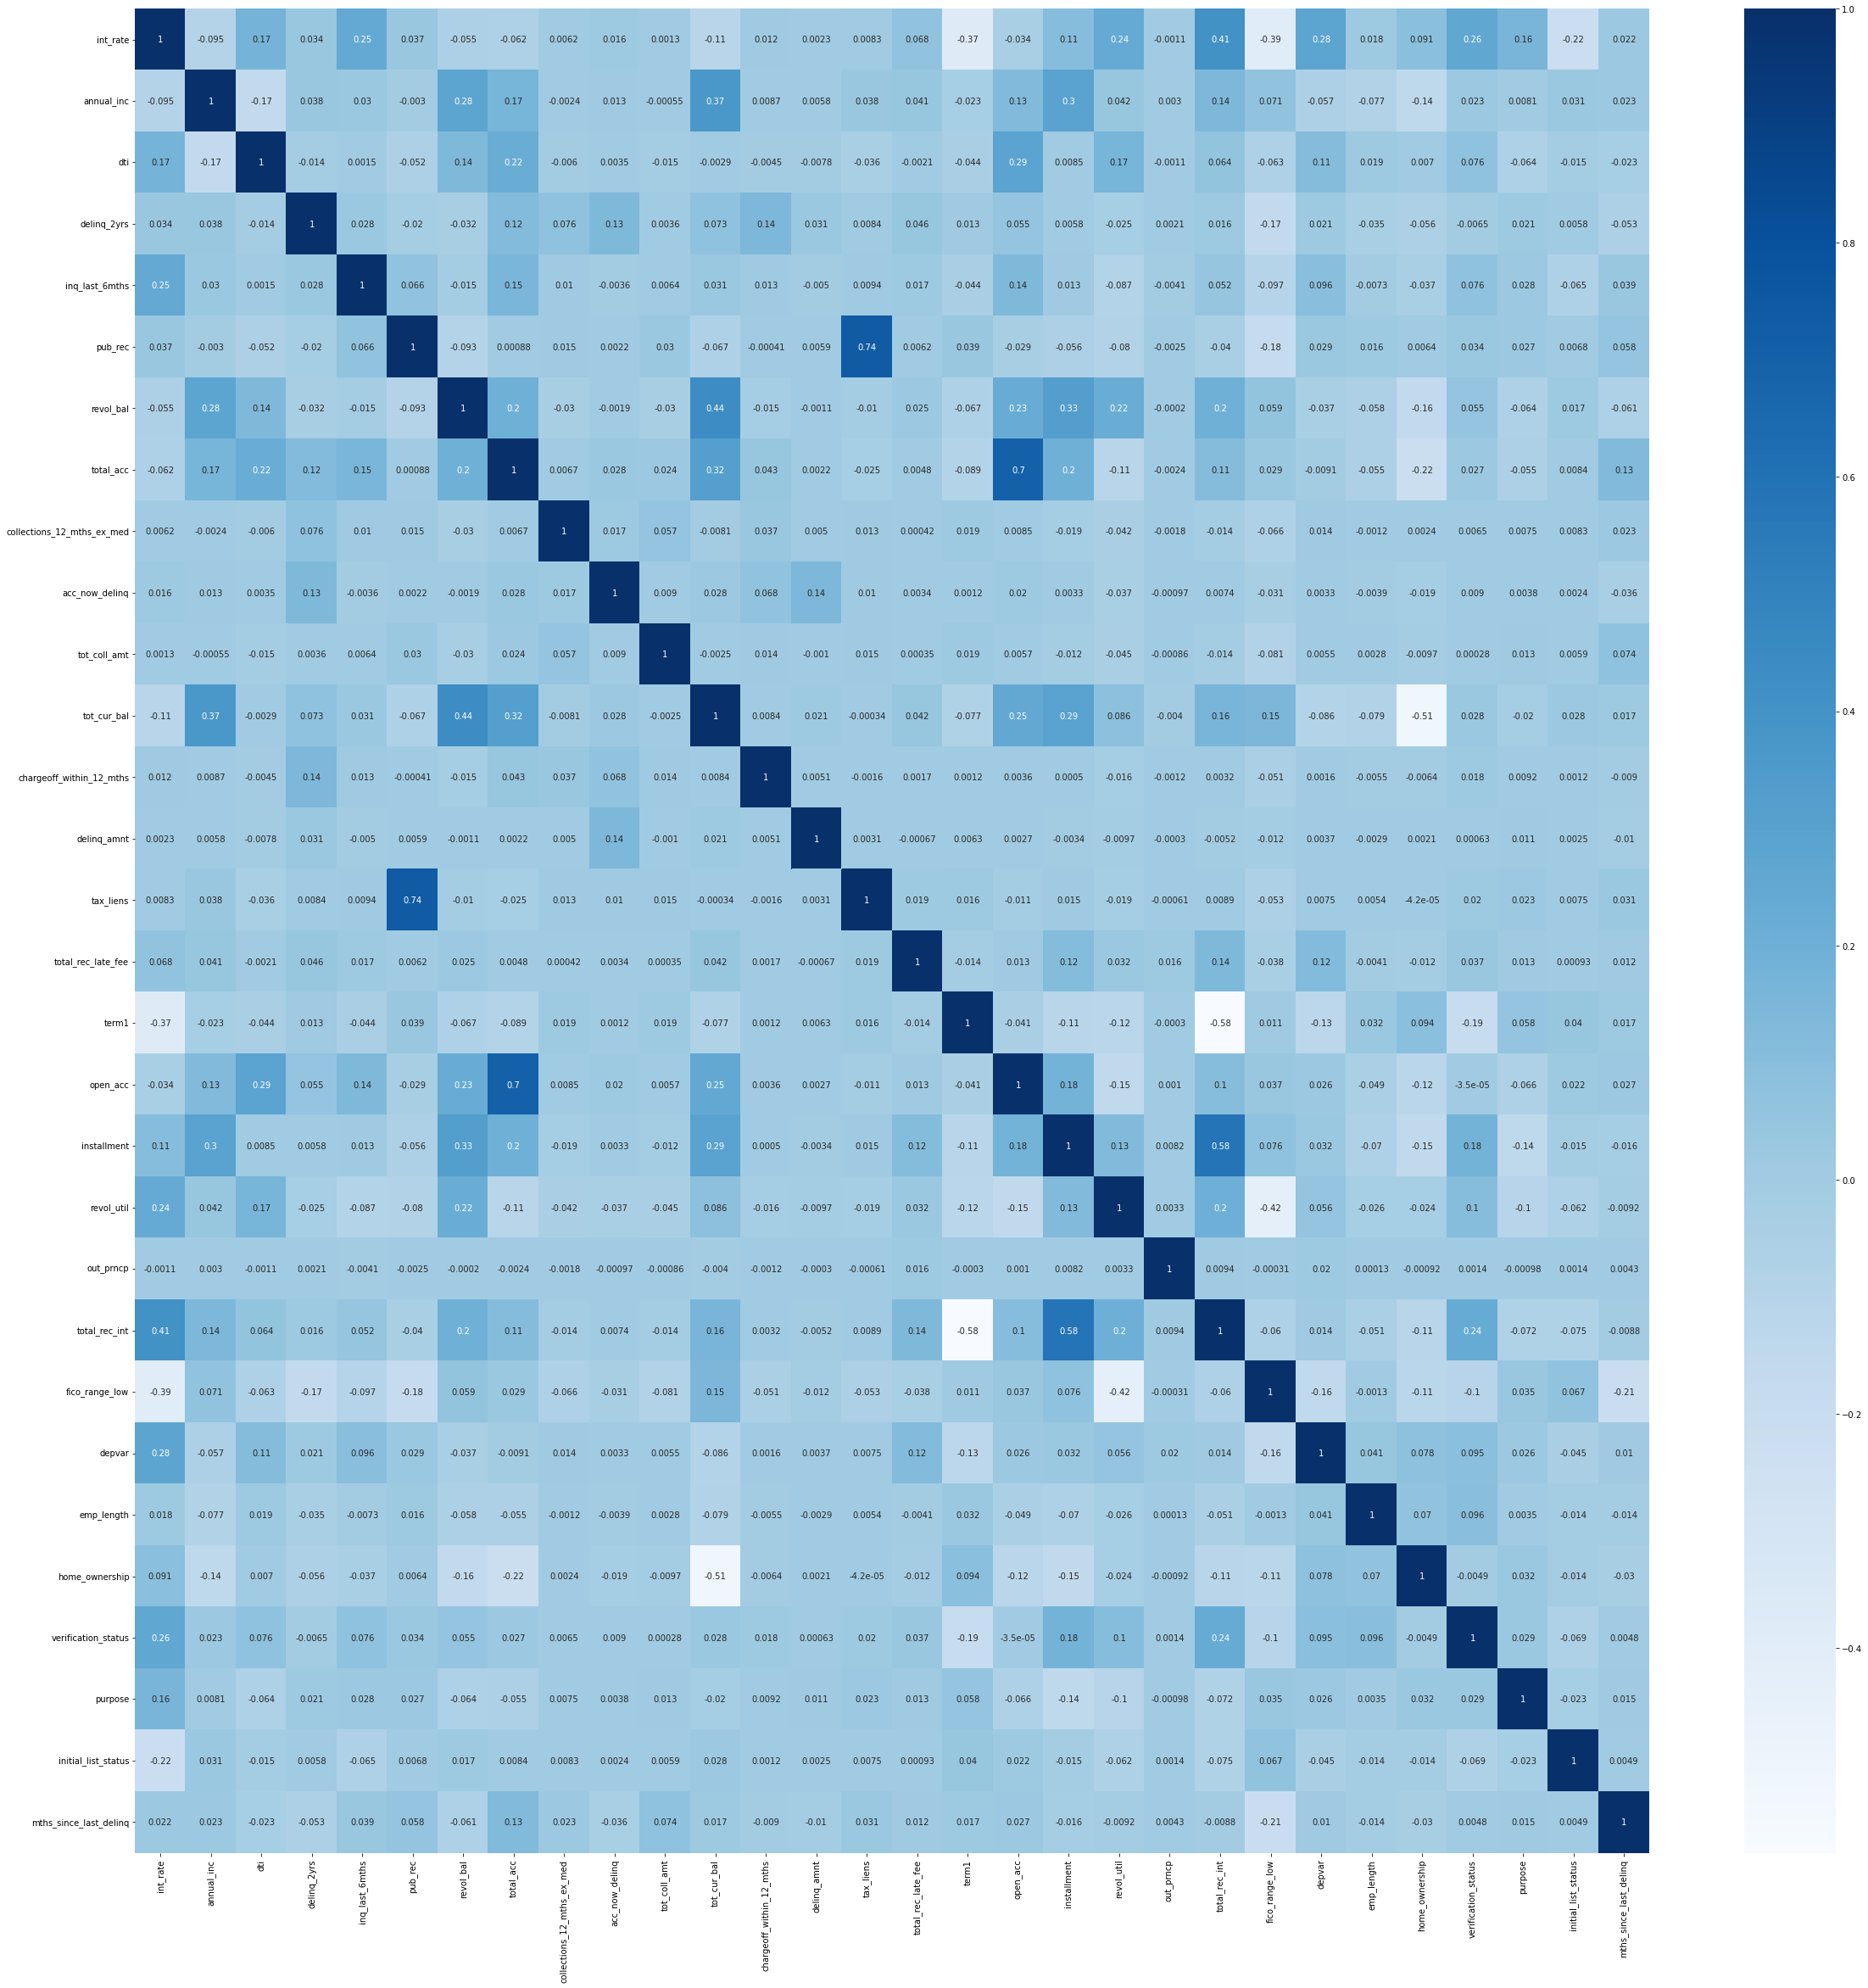

In [310]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

In [311]:
plt.figure(figsize = (10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [312]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,16.805709,int_rate
1,2.597910,annual_inc
2,7.539042,dti
3,1.245751,delinq_2yrs
4,1.719002,inq_last_6mths
5,2.599549,pub_rec
6,2.272210,revol_bal
7,12.042296,total_acc
8,1.029173,collections_12_mths_ex_med
9,1.050148,acc_now_delinq


In [313]:
vif[vif["VIF Factor"] > 10].sort_values('VIF Factor',ascending=False)

,VIF Factor,features
22,54.020948,fico_range_low
0,16.805709,int_rate
16,12.443142,term1
17,12.136611,open_acc
7,12.042296,total_acc
28,11.384872,initial_list_status


In [314]:
for column in vif[vif["VIF Factor"] > 10]['features']:
    print(column, df[column].corr(df['depvar']))

int_rate 0.27794396446258884
total_acc -0.009060165120316578
term1 -0.13018530497821956
open_acc 0.026434878843903883
fico_range_low -0.15584008634806276
initial_list_status -0.04451497756271098


In [315]:
# 라벨(depvar) 비율 확인
print('y=1 ratio :', df.depvar.sum()/len(df))

y=1 ratio : 0.32569


In [316]:
X = df.drop('depvar', axis=1)
y = df['depvar']

# Train Valid Split

In [317]:
# data를 training set과 validation set으로 나누기
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [318]:
# training set과 validation set의 데이터 수 확인
print('training set length :', len(X_train))
print('validation set length :', len(X_valid))

training set length : 80000
validation set length : 20000


In [319]:
# validation set의 라벨 비율 확인
y_valid.sum()/len(y_valid)

0.3269

### Robust scaler(median & IQR) -> StandardScaler로 변경

In [320]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
print(sc.fit(X_train))
X_train_scaled = sc.transform(X_train)
X_valid_scaled = sc.transform(X_valid)

X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_valid = pd.DataFrame(X_valid_scaled, index=X_valid.index, columns=X_valid.columns)

RobustScaler()


### Oversampling Undersampling

In [321]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [322]:
X_train_tomek, y_train_tomek = TomekLinks().fit_resample(X_train, y_train)

In [323]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

# Single Model(XGBoost)
## XGBClassifier의 하이퍼 파라미터 설명
- **LINK** : https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier
- **max_depth=3** : 디시전 트리의 최대 깊이
- **learning_rate=0.1** : 0과 1 사이의 값을 가지는 부스팅에 대한 학습률(eta). 매 부스팅 단계 이후 새로이 추가된 가중치는 이 파라미터로 조정된다. 이 값이 낮을수록 보수적이며, 수렴에 필요한 더 많은 디시전 트리가 필요하다.
- **n_estimators=100** : 라운드의 횟수 또는 부스팅된 디시전 트리의 개수
- **silent=True** : 부스팅의 수행 동안 메시지를 출력할지에 대한 여부
- **objective="reg:linear"** : 모델이 학습할 작업의 분류, 미리 정의된 작업은 문자열로 지정이 가능하지만, 그렇지 않은 경우 콜러블callable을 만들어서 지정할 수도 있다.
- **booster="gbtree"** : 'gbtree', 'gblinear', 'dart'일 수 있다. 'dart'는 드롭아웃(dropout)이라는 특성을 추가한다(과적합 방지를 위해 무작위로 디시전 트리를 선택해 제거(드롭)한다). 'gblinear'는 정규화된 선형 모델을 만든다(디시전 트리가 아니라 라소 회귀와 유사하다).
- **nthread=None** : 더 이상 사용되지 않는다.
- **n_jobs** : 사용할 스레드의 개수
- **gamma=0** : 노드 분할에 필요한 최소 손실 감소
- **min_child_weight=1** : 자식 노드 생성에 필요한 헤시안(hessian) 합의 최솟값
- **max_delta_step=0** : 보다 보수적으로 갱신을 수행하도록 만드는 값. 불균형 범주의 데이터셋에 대해서는 1부터 10까지의 값으로 설정한다.
- **subsample=1** : 부스팅에 사용할 샘플의 비율
- **colsample_bytree=1** : 부스팅에 사용할 특징 열의 비율
- **colsample_bylevel=1** : 각 디시전 트리의 수준별 사용할 특징 열의 비율
- **colsample_bynode=1** : 각 디시전 트리의 노드별 사용할 특징 열의 비율
- **reg_alpha=0** : L1 정규화(가중치의 평균). 이 값이 클수록 보수적이게 된다.
- **reg_lambda=1** : L2 정규화(가중치의 제곱근). 이 값이 클수록 보수적이게 된다.
- **base_score=.5** : 초기 편향치(bias)
- **seed=None** : 더 이상 사용되지 않는다.
- **random_state=0** : 난수 생성 시드
- **missing=None** : 누락된 데이터가 해석될 값. None은 np.nan을 의미한다.
- **importance_type='gain'** : 특징 중요도의 유형. 'gain', 'weight', 'cover', 'total_gain', 'total_cover'로 설정될 수 있다.

In [324]:
# # 하이퍼 파라미터 튜닝
# xgb_clf = xgboost.XGBClassifier()

# param_grid = {'max_depth':[10], # 20 < 15 < 10
#               'n_estimators':[300, 400], # 100 < 150 < 160 < 170 < 180 < 200 < 300
#               #learning rate는 0.1이 0.001보다 높음
#               }

# cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3) #n_repeats=2

# # grid_search = GridSearchCV(estimator=xgb_clf,
# #                            param_grid=param_grid, 
# #                            n_jobs=-1,
# #                            cv=cv,
# #                            scoring='f1_macro', 
# #                            error_score=0) 

# n_estimators = [int(x) for x in range(300, 400, 5)]
# max_features = ['log2','sqrt']
# max_depth = [int(x) for x in range(5, 15)]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf':min_samples_leaf,
#                'bootstrap':bootstrap}

# rnd_search = RandomizedSearchCV(estimator=xgb_clf,
#                            param_distributions=random_grid,
#                            n_iter=50,
#                            n_jobs=-1,
#                            cv=cv,
#                            scoring='f1_macro', 
#                            verbose=3,
#                            error_score=0,
#                            random_state=42)

# results=rnd_search.fit(X_train, y_train)

# results.best_params_

In [325]:
# best parameter를 사용하여 prediction 수행
xgb_clf_tomek = xgboost.XGBClassifier(max_depth = 10,
                                n_estimators = 400 #300
                                  )

xgb_clf_smote = xgboost.XGBClassifier(max_depth = 10,
                                n_estimators = 400 #300
                                  )

# xgb_clf_tomek = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 max_features = results.best_params_['max_features'],
#                                 min_samples_split = results.best_params_['min_samples_split'],
#                                 min_samples_leaf = results.best_params_['min_samples_leaf'],
#                                 bootstrap = results.best_params_['bootstrap'],
#                                 eval_metric='mlogloss',
#                                 # tree_method='gpu_hist',
#                                 # predictor='gpu_predictor'
#                                 )

# xgb_clf_smote = xgboost.XGBClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 max_features = results.best_params_['max_features'],
#                                 min_samples_split = results.best_params_['min_samples_split'],
#                                 min_samples_leaf = results.best_params_['min_samples_leaf'],
#                                 bootstrap = results.best_params_['bootstrap'],
#                                 eval_metric='mlogloss',
#                                 # tree_method='gpu_hist',
#                                 # predictor='gpu_predictor'
#                                 )

xgb_clf_tomek.fit(X_train_tomek, y_train_tomek)
xgb_clf_smote.fit(X_train_smote, y_train_smote)

y_pred_xgb_tomek = xgb_clf_tomek.predict(X_valid)
y_pred_xgb_smote = xgb_clf_smote.predict(X_valid)

In [326]:
# y_valid가 0 또는 1일 확률 출력
y_pred_prob_tomek = xgb_clf_tomek.predict_proba(X_valid)

print(len(y_pred_prob_tomek))
y_pred_prob_tomek

20000


array([[0.08771533, 0.9122847 ],
       [0.9144142 , 0.08558577],
       [0.88150686, 0.11849312],
       ...,
       [0.8532417 , 0.14675829],
       [0.6797697 , 0.3202303 ],
       [0.93724656, 0.06275342]], dtype=float32)

In [327]:
y_pred_prob_smote = xgb_clf_smote.predict_proba(X_valid)

print(len(y_pred_prob_smote))
y_pred_prob_smote

20000


array([[0.17239588, 0.8276041 ],
       [0.8806343 , 0.11936566],
       [0.8981278 , 0.10187218],
       ...,
       [0.83949405, 0.16050594],
       [0.62469184, 0.3753082 ],
       [0.94074523, 0.05925477]], dtype=float32)

In [328]:
# y_valid가 1일 확률 출력
y_pred_prob_smote[:,1]

array([0.8276041 , 0.11936566, 0.10187218, ..., 0.16050594, 0.3753082 ,
       0.05925477], dtype=float32)

In [329]:
# y_valid가 1일 확률 출력
y_pred_prob_tomek[:,1]

array([0.9122847 , 0.08558577, 0.11849312, ..., 0.14675829, 0.3202303 ,
       0.06275342], dtype=float32)

In [330]:
# y_valid 예측값 출력
# y_pred_prob[:,1]이 0.5(threshold)보다 큰 경우 1의 예측값을 return한다

print(len(y_pred_xgb_smote))
print(len(y_pred_xgb_tomek))
y_pred_xgb_smote

20000
20000


array([1, 0, 0, ..., 0, 0, 0])

In [331]:
y_pred_xgb_tomek

array([1, 0, 0, ..., 0, 0, 0])

In [332]:
# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb_smote.sum())
print(y_pred_xgb_smote.sum()/len(y_pred_xgb_smote))

5201
0.26005


In [333]:
# 1로 예측된 y_valid 갯수 및 비율 출력
print(y_pred_xgb_tomek.sum())
print(y_pred_xgb_tomek.sum()/len(y_pred_xgb_tomek))

5687
0.28435


In [334]:
# 평가 함수 정의
def get_clf_eval(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    AUC = roc_auc_score(y_actual, y_pred)
    F1 = f1_score(y_actual, y_pred)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('AUC: {:.4f}'.format(AUC))
    print('F1: {:.4f}'.format(F1))
    
    sns.heatmap(confusion_matrix(y_actual, y_pred), annot=True, fmt='d', cmap='YlGnBu')


정확도: 0.7541
정밀도: 0.6558
재현율: 0.5217
AUC: 0.6944
F1: 0.5811


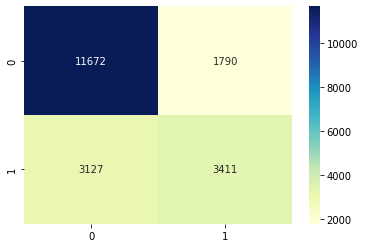

In [335]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb_smote)
# 정확도: 0.7558
# 정밀도: 0.6563
# 재현율: 0.5250
# AUC: 0.6961
# F1: 0.5834


정확도: 0.7554
정밀도: 0.6448
재현율: 0.5609
AUC: 0.7054
F1: 0.5999


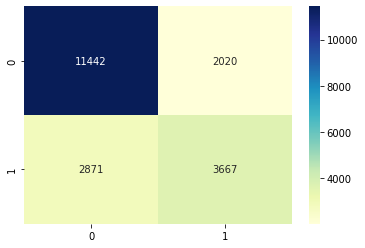

In [336]:
# xgboost 성능 확인
get_clf_eval(y_valid, y_pred_xgb_tomek)

# 정확도: 0.7548
# 정밀도: 0.6414
# 재현율: 0.5602
# AUC: 0.7045
# F1: 0.5980


정확도: 0.7493
정밀도: 0.6138
재현율: 0.6292
AUC: 0.7185
F1: 0.6214


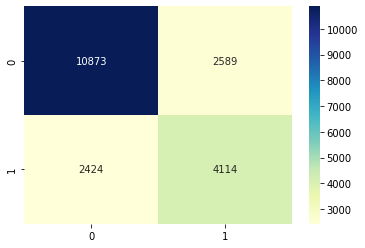

In [337]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob_smote[:,1]>0.41)
# 정확도: 0.7497
# 정밀도: 0.6113
# 재현율: 0.6352
# AUC: 0.7201
# F1: 0.6231


정확도: 0.7470
정밀도: 0.6044
재현율: 0.6546
AUC: 0.7233
F1: 0.6285


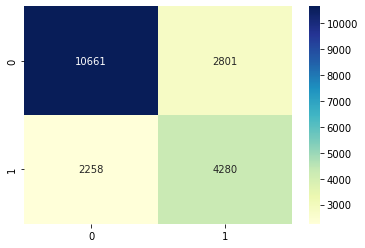

In [338]:
# threshold 변경 및 성능 확인
get_clf_eval(y_valid, y_pred_prob_tomek[:,1]>0.41)
# 정확도: 0.7467
# 정밀도: 0.6021
# 재현율: 0.6549
# AUC: 0.7229
# F1: 0.6274

### RandomForest

In [339]:
# rnd_clf = RandomForestClassifier()

# rnd_clf.fit(X_train, y_train)

# y_pred = rnd_clf.predict(X_valid)

# get_clf_eval(y_valid, y_pred)

# param_grid = {'max_depth':[30, 32], # 10 < 20 < 25, 40, 35 < 30 < 32
#               'n_estimators':[300, 350] # 100 < 150 < 200 < 250, 400, 350 < 300
#               }


# cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2) #n_repeats=2

# grid_search = GridSearchCV(estimator=rnd_clf,
#                            param_grid=param_grid, 
#                            n_jobs=-1,
#                            cv=cv,
#                            scoring='f1_macro', 
#                            error_score=0) 

# results=grid_search.fit(X_train, y_train)

# results.best_params_

In [340]:
# best parameter를 사용하여 prediction 수행
# rnd_clf = RandomForestClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 )

# rnd_clf = RandomForestClassifier(max_depth = 32,
#                                 n_estimators = 300,
#                                 )

# rnd_clf.fit(X_train, y_train)

###LGBM

In [341]:
# lgbm_clf = LGBMClassifier()

# # param_grid = {'max_depth':[15], #10, 20 < 15
# #               'n_estimators':[400, 450] # 100 < 150 < 200 < 250 < 300, 500, 450 < 400
# #               }


# cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3) #n_repeats=2

# # lgbm_clf = GridSearchCV(estimator=lgbm_clf,
# #                            param_grid=param_grid, 
# #                            n_jobs=-1,
# #                            cv=cv,
# #                            scoring='f1_macro', 
# #                            error_score=0) 

# n_estimators = [int(x) for x in range(100, 450, 5)]
# max_features = ['log2','sqrt']
# max_depth = [int(x) for x in range(10, 20)]
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf':min_samples_leaf,
#                'bootstrap':bootstrap}

# rnd_search = RandomizedSearchCV(estimator=xgb_clf,
#                            param_distributions=random_grid,
#                            n_iter=50,
#                            n_jobs=-1,
#                            cv=cv,
#                            scoring='f1_macro', 
#                            verbose=2,
#                            error_score=0,
#                            random_state=42)

# results=rnd_search.fit(X_train, y_train)

# results.best_params_

In [342]:
lgbm_clf_tomek = LGBMClassifier(max_depth = 15,
                          n_estimators = 400
                          )

lgbm_clf_smote = LGBMClassifier(max_depth = 15,
                          n_estimators = 400
                          )

# lgbm_clf_tomek = LGBMClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 max_features = results.best_params_['max_features'],
#                                 min_samples_split = results.best_params_['min_samples_split'],
#                                 min_samples_leaf = results.best_params_['min_samples_leaf'],
#                                 bootstrap = results.best_params_['bootstrap']
#                           )

# lgbm_clf_smote = LGBMClassifier(max_depth = results.best_params_['max_depth'],
#                                 n_estimators = results.best_params_['n_estimators'],
#                                 max_features = results.best_params_['max_features'],
#                                 min_samples_split = results.best_params_['min_samples_split'],
#                                 min_samples_leaf = results.best_params_['min_samples_leaf'],
#                                 bootstrap = results.best_params_['bootstrap']
#                           )

lgbm_clf_tomek.fit(X_train_tomek, y_train_tomek)
lgbm_clf_smote.fit(X_train_smote, y_train_smote)

LGBMClassifier(max_depth=15, n_estimators=400)


정확도: 0.7580
정밀도: 0.6549
재현율: 0.5489
AUC: 0.7042
F1: 0.5973

정확도: 0.7559
정밀도: 0.6658
재현율: 0.5086
AUC: 0.6923
F1: 0.5767


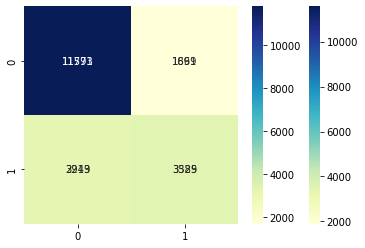

In [343]:
y_pred_tomek = lgbm_clf_tomek.predict(X_valid)
y_pred_smote = lgbm_clf_smote.predict(X_valid)

get_clf_eval(y_valid, y_pred_tomek)
get_clf_eval(y_valid, y_pred_smote)

# 정확도: 0.7548
# 정밀도: 0.6472
# 재현율: 0.5433
# AUC: 0.7001
# F1: 0.5907

# 정확도: 0.7574
# 정밀도: 0.6654
# 재현율: 0.5135
# AUC: 0.6944
# F1: 0.5797


정확도: 0.7500
정밀도: 0.6097
재현율: 0.6540
AUC: 0.7254
F1: 0.6311

정확도: 0.7540
정밀도: 0.6221
재현율: 0.6306
AUC: 0.7223
F1: 0.6263


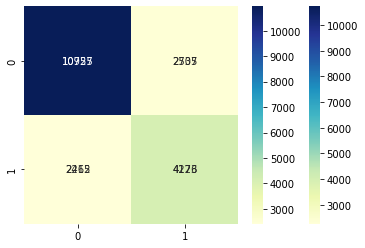

In [344]:
y_pred_prob_tomek = lgbm_clf_tomek.predict_proba(X_valid)
y_pred_prob_smote = lgbm_clf_smote.predict_proba(X_valid)

get_clf_eval(y_valid, y_pred_prob_tomek[:,1] > 0.41)
get_clf_eval(y_valid, y_pred_prob_smote[:,1] > 0.41)


# 정확도: 0.7476
# 정밀도: 0.6058
# 재현율: 0.6443
# AUC: 0.7209
# F1: 0.6245

# 정확도: 0.7504
# 정밀도: 0.6131
# 재현율: 0.6334
# AUC: 0.7202
# F1: 0.6231

# Ensemble(Voting)

In [345]:
# rnd_clf = RandomForestClassifier()
# lgbm_clf = LGBMClassifier()
# rid_clf = RidgeClassifier()
# dtc_clf = DecisionTreeClassifier()
# svm_clf = SVC()
# ada_clf = AdaBoostClassifier()
# gbc_clf = GradientBoostingClassifier()
# bag_clf = BaggingClassifier()
# ext_clf = ExtraTreesClassifier()
# knn_clf = KNeighborsClassifier()
# svc_clf = SVC()

# voting_clf = VotingClassifier(estimators=[('rnd', rnd_clf), ('lgbm', lgbm_clf), ('xgb', xgb_clf)], voting='soft')

In [346]:
# for clf in (rnd_clf, lgbm_clf, xgb_clf, voting_clf):
#     clf.fit(X_train, y_train)
#     y_pred_vote = clf.predict(X_valid)

# # ensemble(voting) 성능 확인
# get_clf_eval(y_valid, y_pred_vote)

# Ensemble(Stacking)

In [347]:
stacking_clf = StackingClassifier(estimators=[('lgbm1', lgbm_clf_tomek), ('lgbm2', lgbm_clf_smote), ('xgb1', xgb_clf_tomek), ('xgb2', xgb_clf_smote)], final_estimator = LGBMClassifier())
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lgbm1',
                                LGBMClassifier(max_depth=15, n_estimators=400)),
                               ('lgbm2',
                                LGBMClassifier(max_depth=15, n_estimators=400)),
                               ('xgb1',
                                XGBClassifier(max_depth=10, n_estimators=400)),
                               ('xgb2',
                                XGBClassifier(max_depth=10, n_estimators=400))],
                   final_estimator=LGBMClassifier())

In [348]:
y_pred_stack = stacking_clf.predict_proba(X_valid)
y_pred_stack

array([[0.17951706, 0.82048294],
       [0.90723456, 0.09276544],
       [0.89359641, 0.10640359],
       ...,
       [0.74059189, 0.25940811],
       [0.6376372 , 0.3623628 ],
       [0.94727469, 0.05272531]])


정확도: 0.7530
정밀도: 0.6157
재현율: 0.6502
AUC: 0.7266
F1: 0.6325


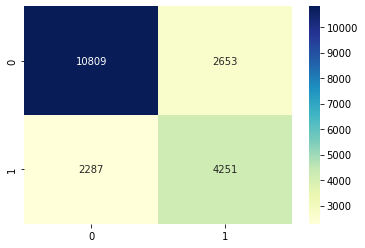

In [349]:
y_pred_stack = y_pred_stack[:,1] > 0.41
# ensemble(stacking) 성능 확인
get_clf_eval(y_valid, y_pred_stack)
#정확도: 0.7564, F1: 0.6095 -> random forest, lgbm, xgb
#정확도: 0.7550, F1: 0.6074 -> lgbm, xgb
#정확도: 0.7511, F1: 0.6058 -> rnd, lgbm, xgb 파라미터 튜닝
#정확도: 0.7337, F1: 0.6357 -> rnd, lgbm, xgb threshold 0.4 적용 -> 실제 테스트에서 점수 낮아짐
#정확도: 0.7548, F1: 0.6216 -> rnd, lgbm, xgb
#정확도: 0.7322 정밀도: 0.5695 재현율: 0.7042 AUC: 0.7249 F1: 0.6297 -> smote, tomek로 각각 lgbm, xgb 총 4개 모델 stack으로 학습 후 threshold 0.38일 경우
# smote만 학습한 lgbm, xgb 모델로 데이터도 smote 적용된 데이터셋으로 다시 학습했더니 성능 저하

# 정확도: 0.7477 정밀도: 0.6005 재현율: 0.6591 AUC: 0.7246 F1: 0.6284 -> 동일 조건에 데이터 합쳤을 경우 테스트에서도 0.713으로 떨어짐
# 정확도: 0.7407 정밀도: 0.5849 재현율: 0.6927 AUC: 0.7282 F1: 0.6343 -> StandardScaler로 변경 성능 저하
# 정확도: 0.7431 정밀도: 0.5934 재현율: 0.6863 AUC: 0.7285 F1: 0.6345 -> 0.7198775585 threshold 0.41일때가 가장 높음

# 정확도: 0.7471
# 정밀도: 0.6010
# 재현율: 0.6655
# AUC: 0.7260
# F1: 0.6316

# Submission

In [350]:
# 제출 양식 다운로드
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/220126//data/sample_submission.csv')

# prediction 수행
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/220126//data/test.csv')

df_test = df_test.drop(columns=['ID'])


### 컬럼 합쳐주기

In [351]:
df_test['emp_length'] = 0

for i, column in enumerate(df_test.loc[:,'emp_length1':'emp_length12'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['emp_length'][j] = i

df_test = df_test.drop(df_test.loc[:,'emp_length1':'emp_length12'].columns, axis=1)

In [352]:
df_test['home_ownership'] = 0

for i, column in enumerate(df_test.loc[:,'home_ownership1':'home_ownership6'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['home_ownership'][j] = i

df_test = df_test.drop(df_test.loc[:,'home_ownership1':'home_ownership6'].columns, axis=1)

In [353]:
df_test['verification_status'] = 0

for i, column in enumerate(df_test.loc[:,'verification_status1':'verification_status3'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['verification_status'][j] = i

df_test = df_test.drop(df_test.loc[:,'verification_status1':'verification_status3'].columns, axis=1)

In [354]:
df_test['purpose'] = 0

for i, column in enumerate(df_test.loc[:,'purpose1':'purpose14'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['purpose'][j] = i

df_test = df_test.drop(df_test.loc[:,'purpose1':'purpose14'].columns, axis=1)

In [355]:
df_test['initial_list_status'] = 0

for i, column in enumerate(df_test.loc[:,'initial_list_status1':'initial_list_status2'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['initial_list_status'][j] = i

df_test = df_test.drop(df_test.loc[:,'initial_list_status1':'initial_list_status2'].columns, axis=1)

In [356]:
df_test['mths_since_last_delinq'] = 0

for i, column in enumerate(df_test.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns,1):
    for j, data in enumerate(df_test[column]):
        if data == 1:
            df_test['mths_since_last_delinq'][j] = i

df_test = df_test.drop(df_test.loc[:,'mths_since_last_delinq1':'mths_since_last_delinq11'].columns, axis=1)

In [357]:
df_test = df_test.drop(['out_prncp_inv','funded_amnt_inv','fico_range_high','funded_amnt'],axis=1)

### 스케일링 및 학습

In [358]:
df_test_scaled = sc.transform(df_test)
df_test = pd.DataFrame(df_test_scaled, index=df_test.index, columns=df_test.columns)

y_predict_test = stacking_clf.predict_proba(df_test)
y_predict_test

array([[0.30305257, 0.69694743],
       [0.27162902, 0.72837098],
       [0.17112938, 0.82887062],
       ...,
       [0.94876529, 0.05123471],
       [0.83667148, 0.16332852],
       [0.97483805, 0.02516195]])

### 결과



In [359]:
y_predict_test.shape

(35816, 2)

In [360]:
y_predict_test[:,1] > 0.41

array([ True,  True,  True, ..., False, False, False])

In [361]:
submit['answer'] = (y_predict_test[:,1] > 0.41).astype(int)

sum(submit['answer'])/len(submit['answer'])

0.35054165735983916

In [362]:
# 제출 파일 저장
submit.to_csv('/content/drive/MyDrive/Colab Notebooks/220126//data/prediction.csv', index=False)